In [31]:
import pandas as pd 
import numpy as np
import matplotlib.pyplot as plt

In [32]:
data=pd.read_csv('processed_data.csv')
data.head()

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value,ocean_proximity
0,-122.23,37.88,0.982119,-0.804800,-0.971082,-0.974405,-0.977009,8.3252,452600.0,3
1,-122.22,37.86,-0.607004,2.045841,1.350682,0.861418,1.669921,8.3014,358500.0,3
2,-122.24,37.85,1.856137,-0.535733,-0.826120,-0.820757,-0.843616,7.2574,352100.0,3
3,-122.25,37.85,1.856137,-0.624199,-0.719181,-0.766010,-0.733764,5.6431,341300.0,3
4,-122.25,37.85,1.856137,-0.462393,-0.612242,-0.759828,-0.629142,3.8462,342200.0,3


In [ ]:
import numpy as np

class LinearRegression:
    def __init__(self, learningRate, epochs):
        self.learningRate = learningRate
        self.epochs = epochs
        self.weights = None
        self.bias = 0
        self.cost_history = []  # Track cost over time

    def fit(self, X, Y):
        m, n = X.shape
        X = np.c_[np.ones(m), X]  # Add bias term (column of ones)
        self.weights = np.zeros(n + 1)

        for _ in range(self.epochs):
            y_pred = np.dot(X, self.weights)  # Predictions
            error = y_pred - Y  # Error
            
            # Compute cost (Mean Squared Error)
            cost = (1 / (2 * m)) * np.sum(error ** 2)
            self.cost_history.append(cost)  # Store cost

            # Compute gradients
            dw = (1 / m) * np.dot(X.T, error)
            self.weights -= self.learningRate * dw  # Update weights

    def predict(self, X):
        X = np.c_[np.ones(X.shape[0]), X]  # Add bias term for prediction
        return np.dot(X, self.weights)



In [34]:
train_X=data.drop(columns='median_house_value').values
train_Y=data['median_house_value'].values

In [35]:
model=LinearRegression(learningRate=0.0001,epochs=1000)
model.fit(train_X,train_Y)


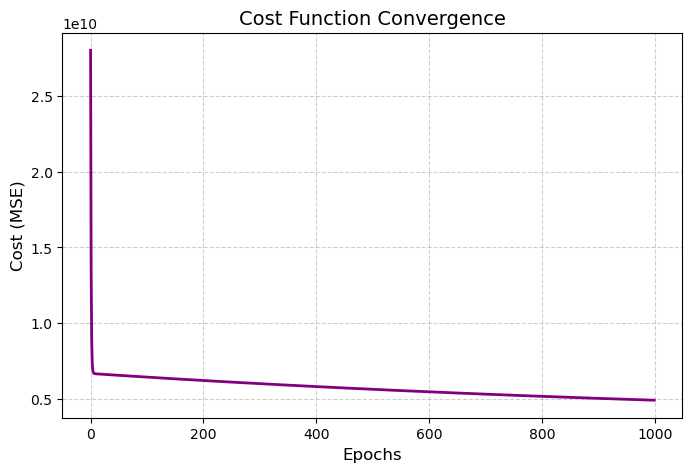

In [36]:
def plot_cost_history(model):
    plt.figure(figsize=(8, 5))
    plt.plot(range(len(model.cost_history)), model.cost_history, color='purple', linewidth=2)
    plt.xlabel("Epochs", fontsize=12)
    plt.ylabel("Cost (MSE)", fontsize=12)
    plt.title("Cost Function Convergence", fontsize=14)
    plt.grid(True, linestyle="--", alpha=0.6)
    plt.show()
plot_cost_history(model)